In this notebook, we test the effects of

* consider velocity distribution in collisional outcome calculations

* bouncing barrier

* mass transfer in collisions where two particles have high mass ratio

see previous work in [Windmark+2012](https://ui.adsabs.harvard.edu/abs/2012A%26A...544L..16W/abstract)

---
PS: The results of solving the Smoluchowski equation numerically are known to depend on resolution, initial setup, and the length of time step (and also the `Python` environment and the machine). It is thus normal if you get slightly different results. If you get qualitatively different results, be sure to test different setups.

# Import Modules

In [1]:
from astropy import units as u
from astropy import constants as c
import numpy as np
import scipy as sp
import mpmath as mp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib nbagg
np.set_printoptions(edgeitems=5, linewidth=180, precision=6)
mp.mp.dps = 25

In [3]:
from rubble import Rubble, RubbleData

In [4]:
dt_1d = 86400; dt_1yr = dt_1d * 365.25

In [5]:
# calculate H used in Windmark+2012
H_W12 = np.sqrt(c.k_B * 280*u.K / (2.3*c.m_p)).to(u.cm/u.s) / np.sqrt(c.G * c.M_sun / u.au**3).to(1/u.s)
print(H_W12)

503489186492.2875 cm


# Consider velocity distribution in collisional outcome calculations

In [13]:
r = Rubble(176, 1e-4, 1e3, 3.5, 17, 
           delta_dist=1e-4,
           Sigma_g = 1700, H = H_W12.value, T = 280, alpha = 1e-4, 
           u_f = 100, 
           run_name = "SF_noVD")

r.vel_dist_flag = False
r.bouncing_flag = False
r.mass_transfer_flag = False
r.run(50000, 2.5, 2.5)

In [14]:
r = Rubble(176, 1e-4, 1e3, 3.5, 17, 
           delta_dist=1e-4,
           Sigma_g = 1700, H = H_W12.value, T = 280, alpha = 1e-4, 
           u_f = 100, 
           run_name = "SF_VD")

r.bouncing_flag = False
r.mass_transfer_flag = False
r.run(50000, 2.5, 2.5)

In [26]:
# shrink data to reduce the size of this git repo
rds = [RubbleData("CF_noVD.dat"), RubbleData("CF_VD.dat")]
rds[0].shrink_data("CF_noVD.dat", sampling_rate=10, keep_first_n=40)
rds[1].shrink_data("CF_VD.dat", sampling_rate=10, keep_first_n=40)

<IPython.core.display.Javascript object>


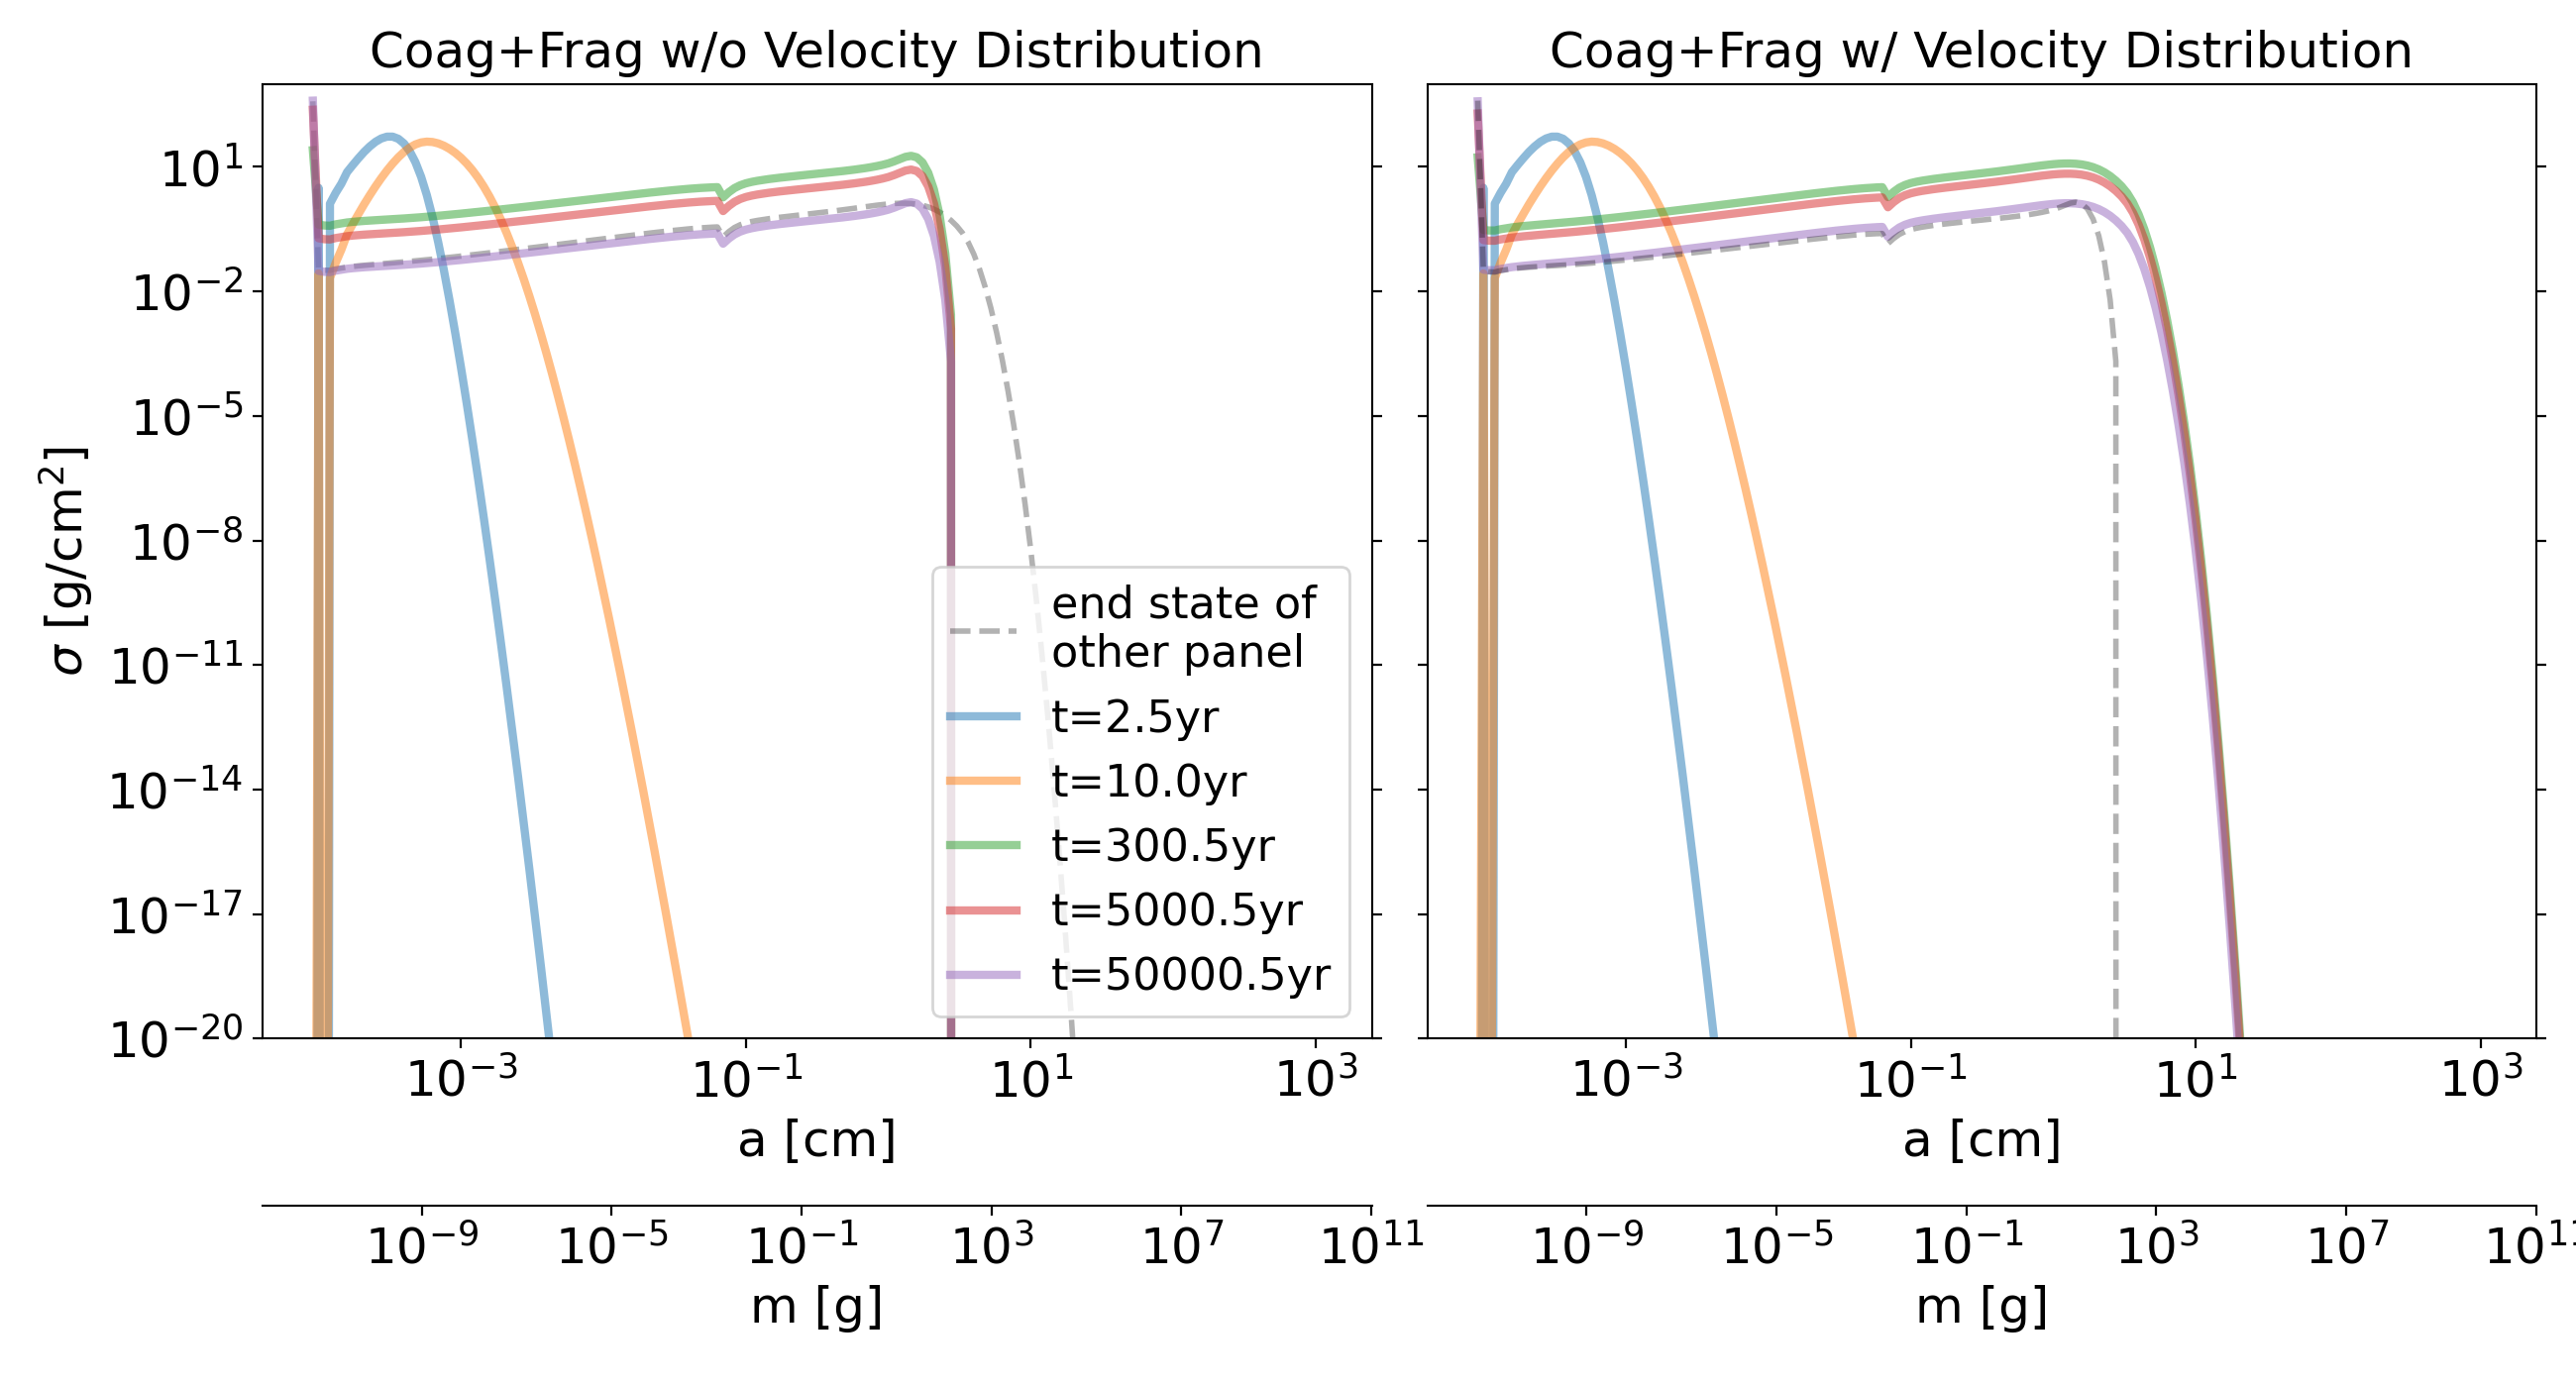

In [14]:
rds = [RubbleData("CF_noVD.dat"), RubbleData("CF_VD.dat")]
rxplt.plt_params('m'); fig, ax = plt.subplots(1, 2, figsize=(13, 7), sharey='row')

selected_t = [2.5, 10, 300, 5000, 50000]
ax[0].loglog(rds[1].a, rds[1].sigma[-1], '--k', lw=2, alpha=0.3, label="end state of\nother panel")
rds[0].plot_snapshots(selected_t, ax=ax[0], label_fmt="t={:.1f}yr")
rds[1].plot_snapshots(selected_t, ax=ax[1])
ax[0].set(title=r"Coag+Frag w/o Velocity Distribution", ylim=[1e-20, 1e3])
ax[0].legend(loc='lower right')
ax[1].loglog(rds[0].a, rds[0].sigma[-1], '--k', lw=2, alpha=0.3)
ax[1].set(ylabel='', title=r"Coag+Frag w/ Velocity Distribution", ylim=[1e-20, 1e3])
ax[1].get_legend().remove()
fig.tight_layout(); fig.subplots_adjust(wspace=0.05)

# Now taking into account the bouncing barrier

In [ ]:
r = Rubble(176, 1e-4, 1e3, 3.5, 17, 
           delta_dist=1e-4,
           Sigma_g = 1700, H = H_W12.value, T = 280, alpha = 1e-4, 
           u_f = 100, 
           run_name = "CBF_noVD")

r.vel_dist_flag = False
r.mass_transfer_flag = False
r.run(50000, 2.5, 2.5)

In [ ]:
r = Rubble(176, 1e-4, 1e3, 3.5, 17, 
           delta_dist=1e-4,
           Sigma_g = 1700, H = H_W12.value, T = 280, alpha = 1e-4, 
           u_f = 100, 
           run_name = "CBF_VD")

r.mass_transfer_flag = False
r.run(50000, 2.5, 2.5)

In [27]:
# shrink data to reduce the size of this git repo
rds = [RubbleData("CBF_noVD.dat"), RubbleData("CBF_VD.dat")]
rds[0].shrink_data("CBF_noVD.dat", sampling_rate=10, keep_first_n=40)
rds[1].shrink_data("CBF_VD.dat", sampling_rate=10, keep_first_n=40)

<IPython.core.display.Javascript object>


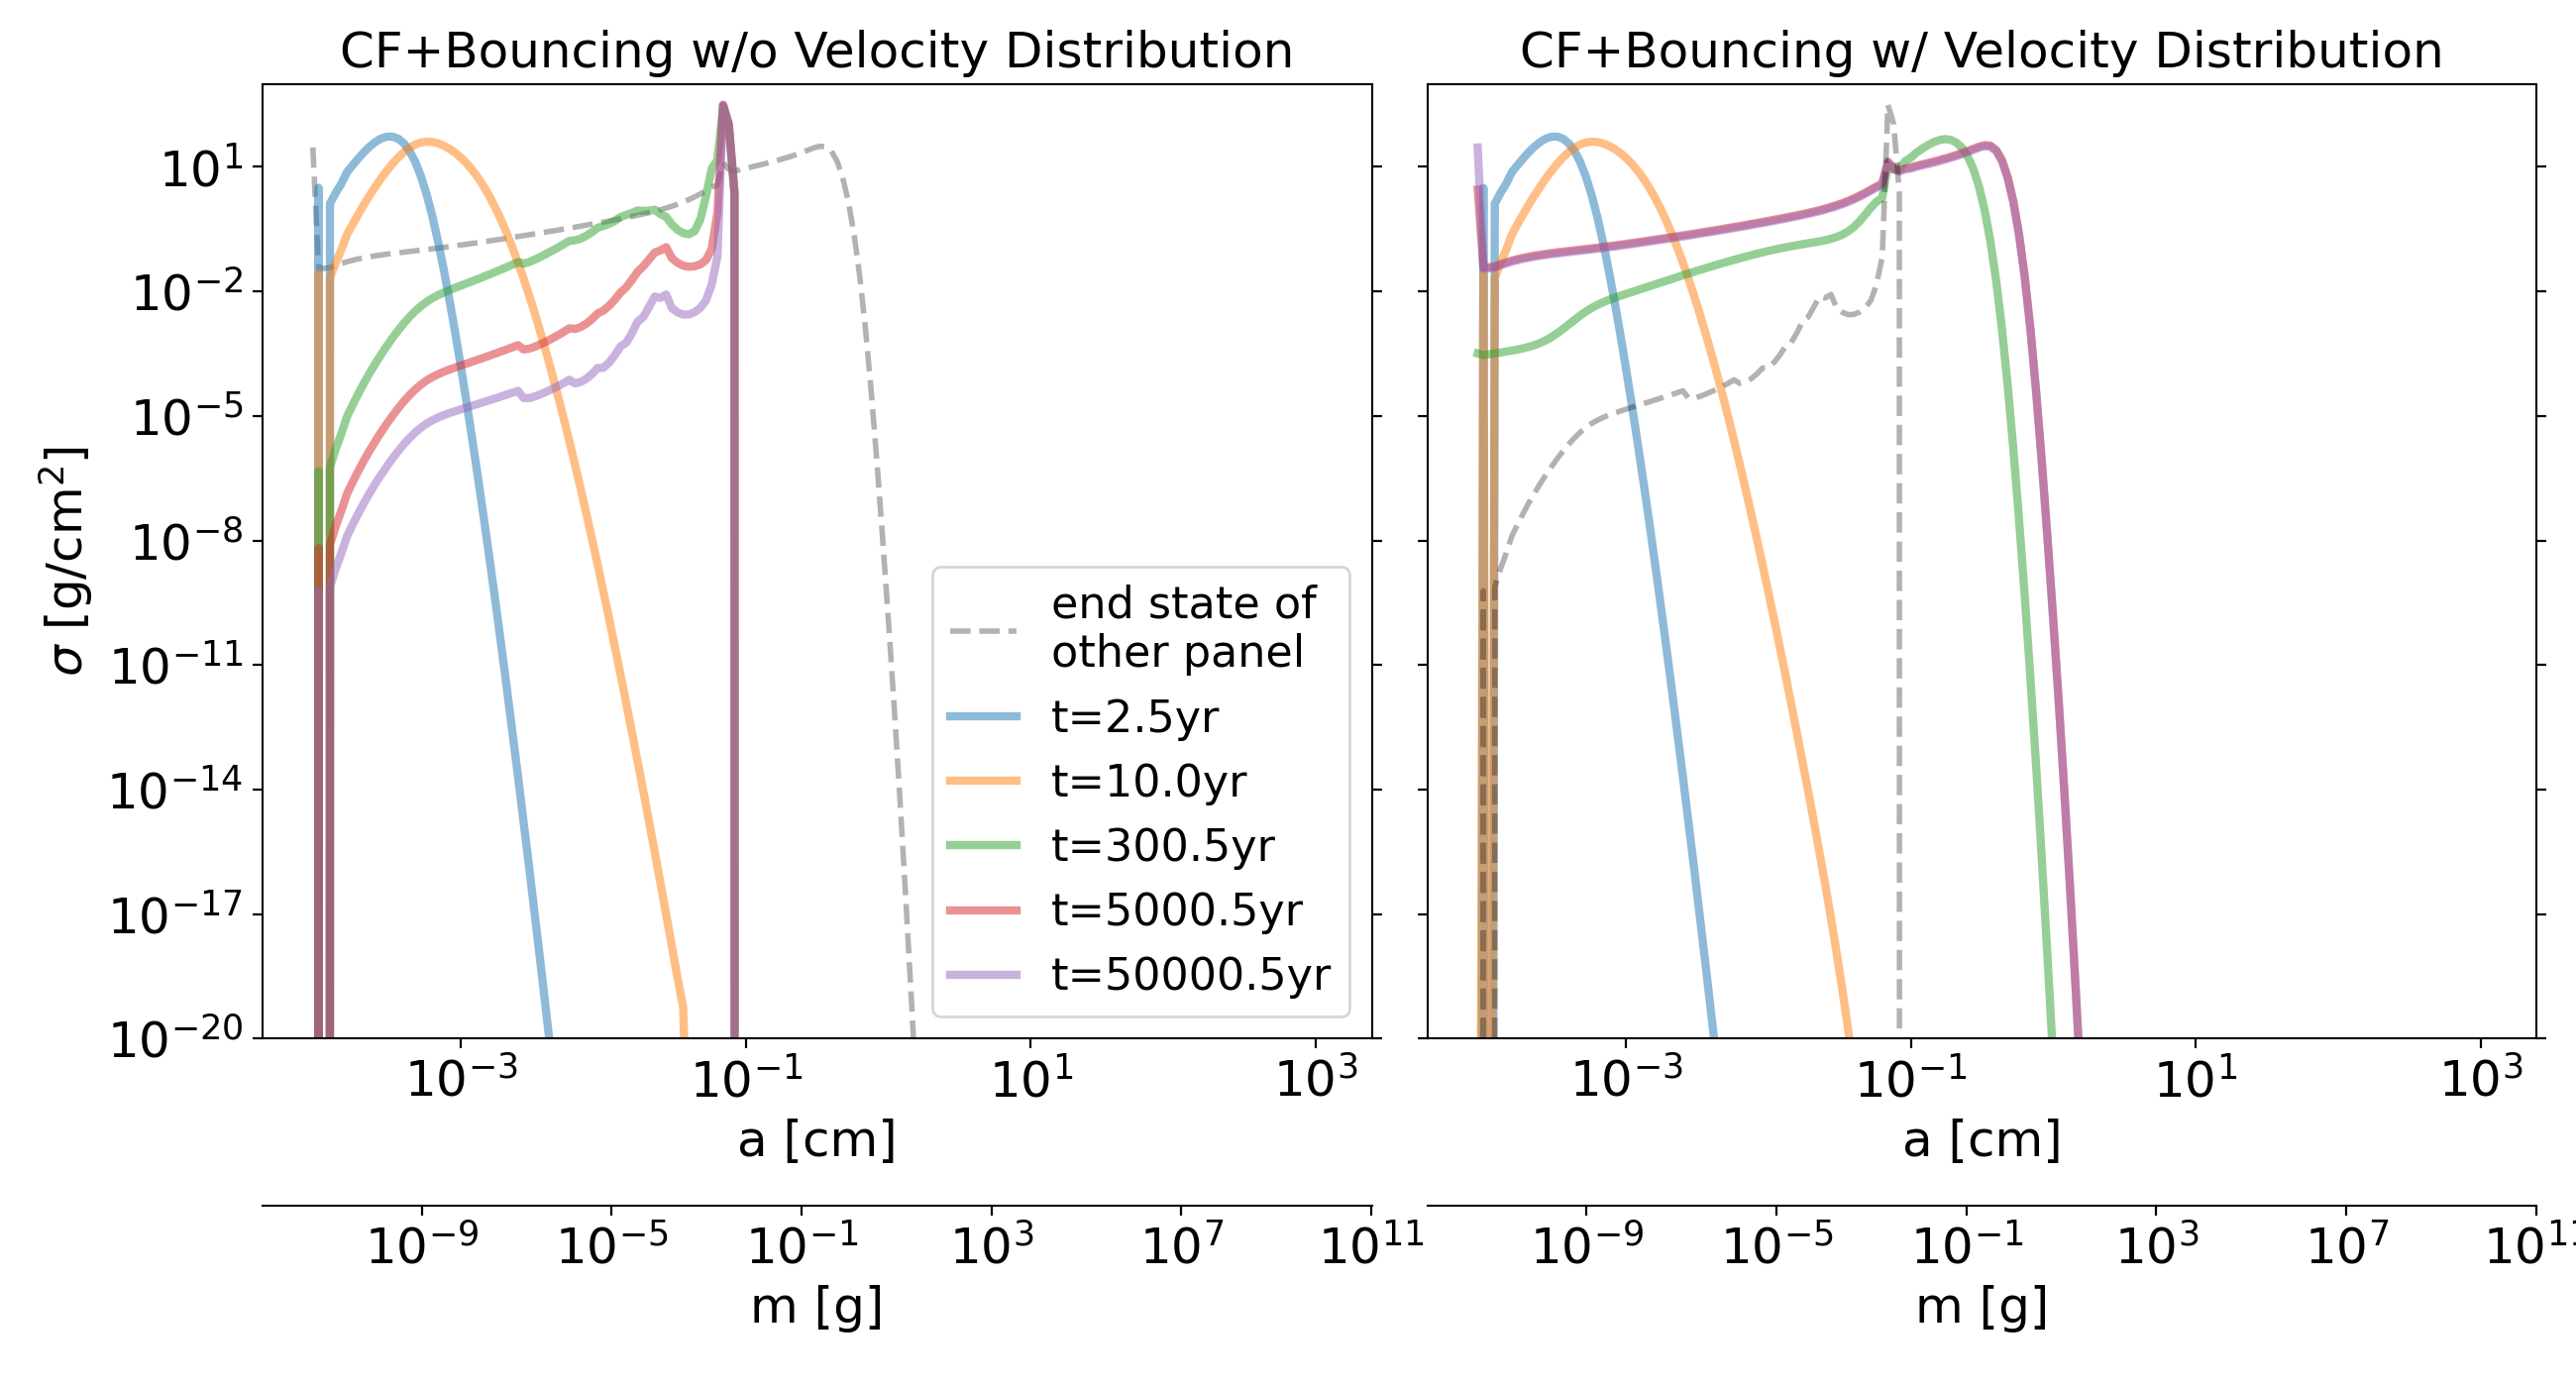

In [18]:
rds = [RubbleData("CBF_noVD.dat"), RubbleData("CBF_VD.dat")]
rxplt.plt_params('m'); fig, ax = plt.subplots(1, 2, figsize=(13, 7), sharey='row')

selected_t = [2.5, 10, 300, 5000, 50000]
ax[0].loglog(rds[1].a, rds[1].sigma[-1], '--k', lw=2, alpha=0.3, label="end state of\nother panel")
rds[0].plot_snapshots(selected_t, ax=ax[0], label_fmt="t={:.1f}yr")
rds[1].plot_snapshots(selected_t, ax=ax[1])
ax[0].set(title=r"CF+Bouncing w/o Velocity Distribution", ylim=[1e-20, 1e3])
ax[0].legend(loc='lower right')
ax[1].loglog(rds[0].a, rds[0].sigma[-1], '--k', lw=2, alpha=0.3)
ax[1].set(ylabel='', title=r"CF+Bouncing w/ Velocity Distribution", ylim=[1e-20, 1e3])
ax[1].get_legend().remove()
fig.tight_layout(); fig.subplots_adjust(wspace=0.05)

# Now further consider mass transfer effects

In [ ]:
r = Rubble(176, 1e-4, 1e3, 3.5, 17, 
           delta_dist=1e-4,
           Sigma_g = 1700, H = H_W12.value, T = 280, alpha = 1e-4, 
           u_f = 100, 
           run_name = "CBF_MT_noVD")

r.vel_dist_flag = False
r.run(50000, 2.5, 2.5)

In [ ]:
r = Rubble(176, 1e-4, 1e3, 3.5, 17, 
           delta_dist=1e-4,
           Sigma_g = 1700, H = H_W12.value, T = 280, alpha = 1e-4, 
           u_f = 100, 
           run_name = "CBF_MT_VD")

r.run(50000, 2.5, 2.5)

In [28]:
# shrink data to reduce the size of this git repo
rds = [RubbleData("CBF_MT_noVD.dat"), RubbleData("CBF_MT_VD.dat")]
rds[0].shrink_data("CBF_MT_noVD.dat", sampling_rate=10, keep_first_n=40)
rds[1].shrink_data("CBF_MT_VD.dat", sampling_rate=10, keep_first_n=40)

<IPython.core.display.Javascript object>


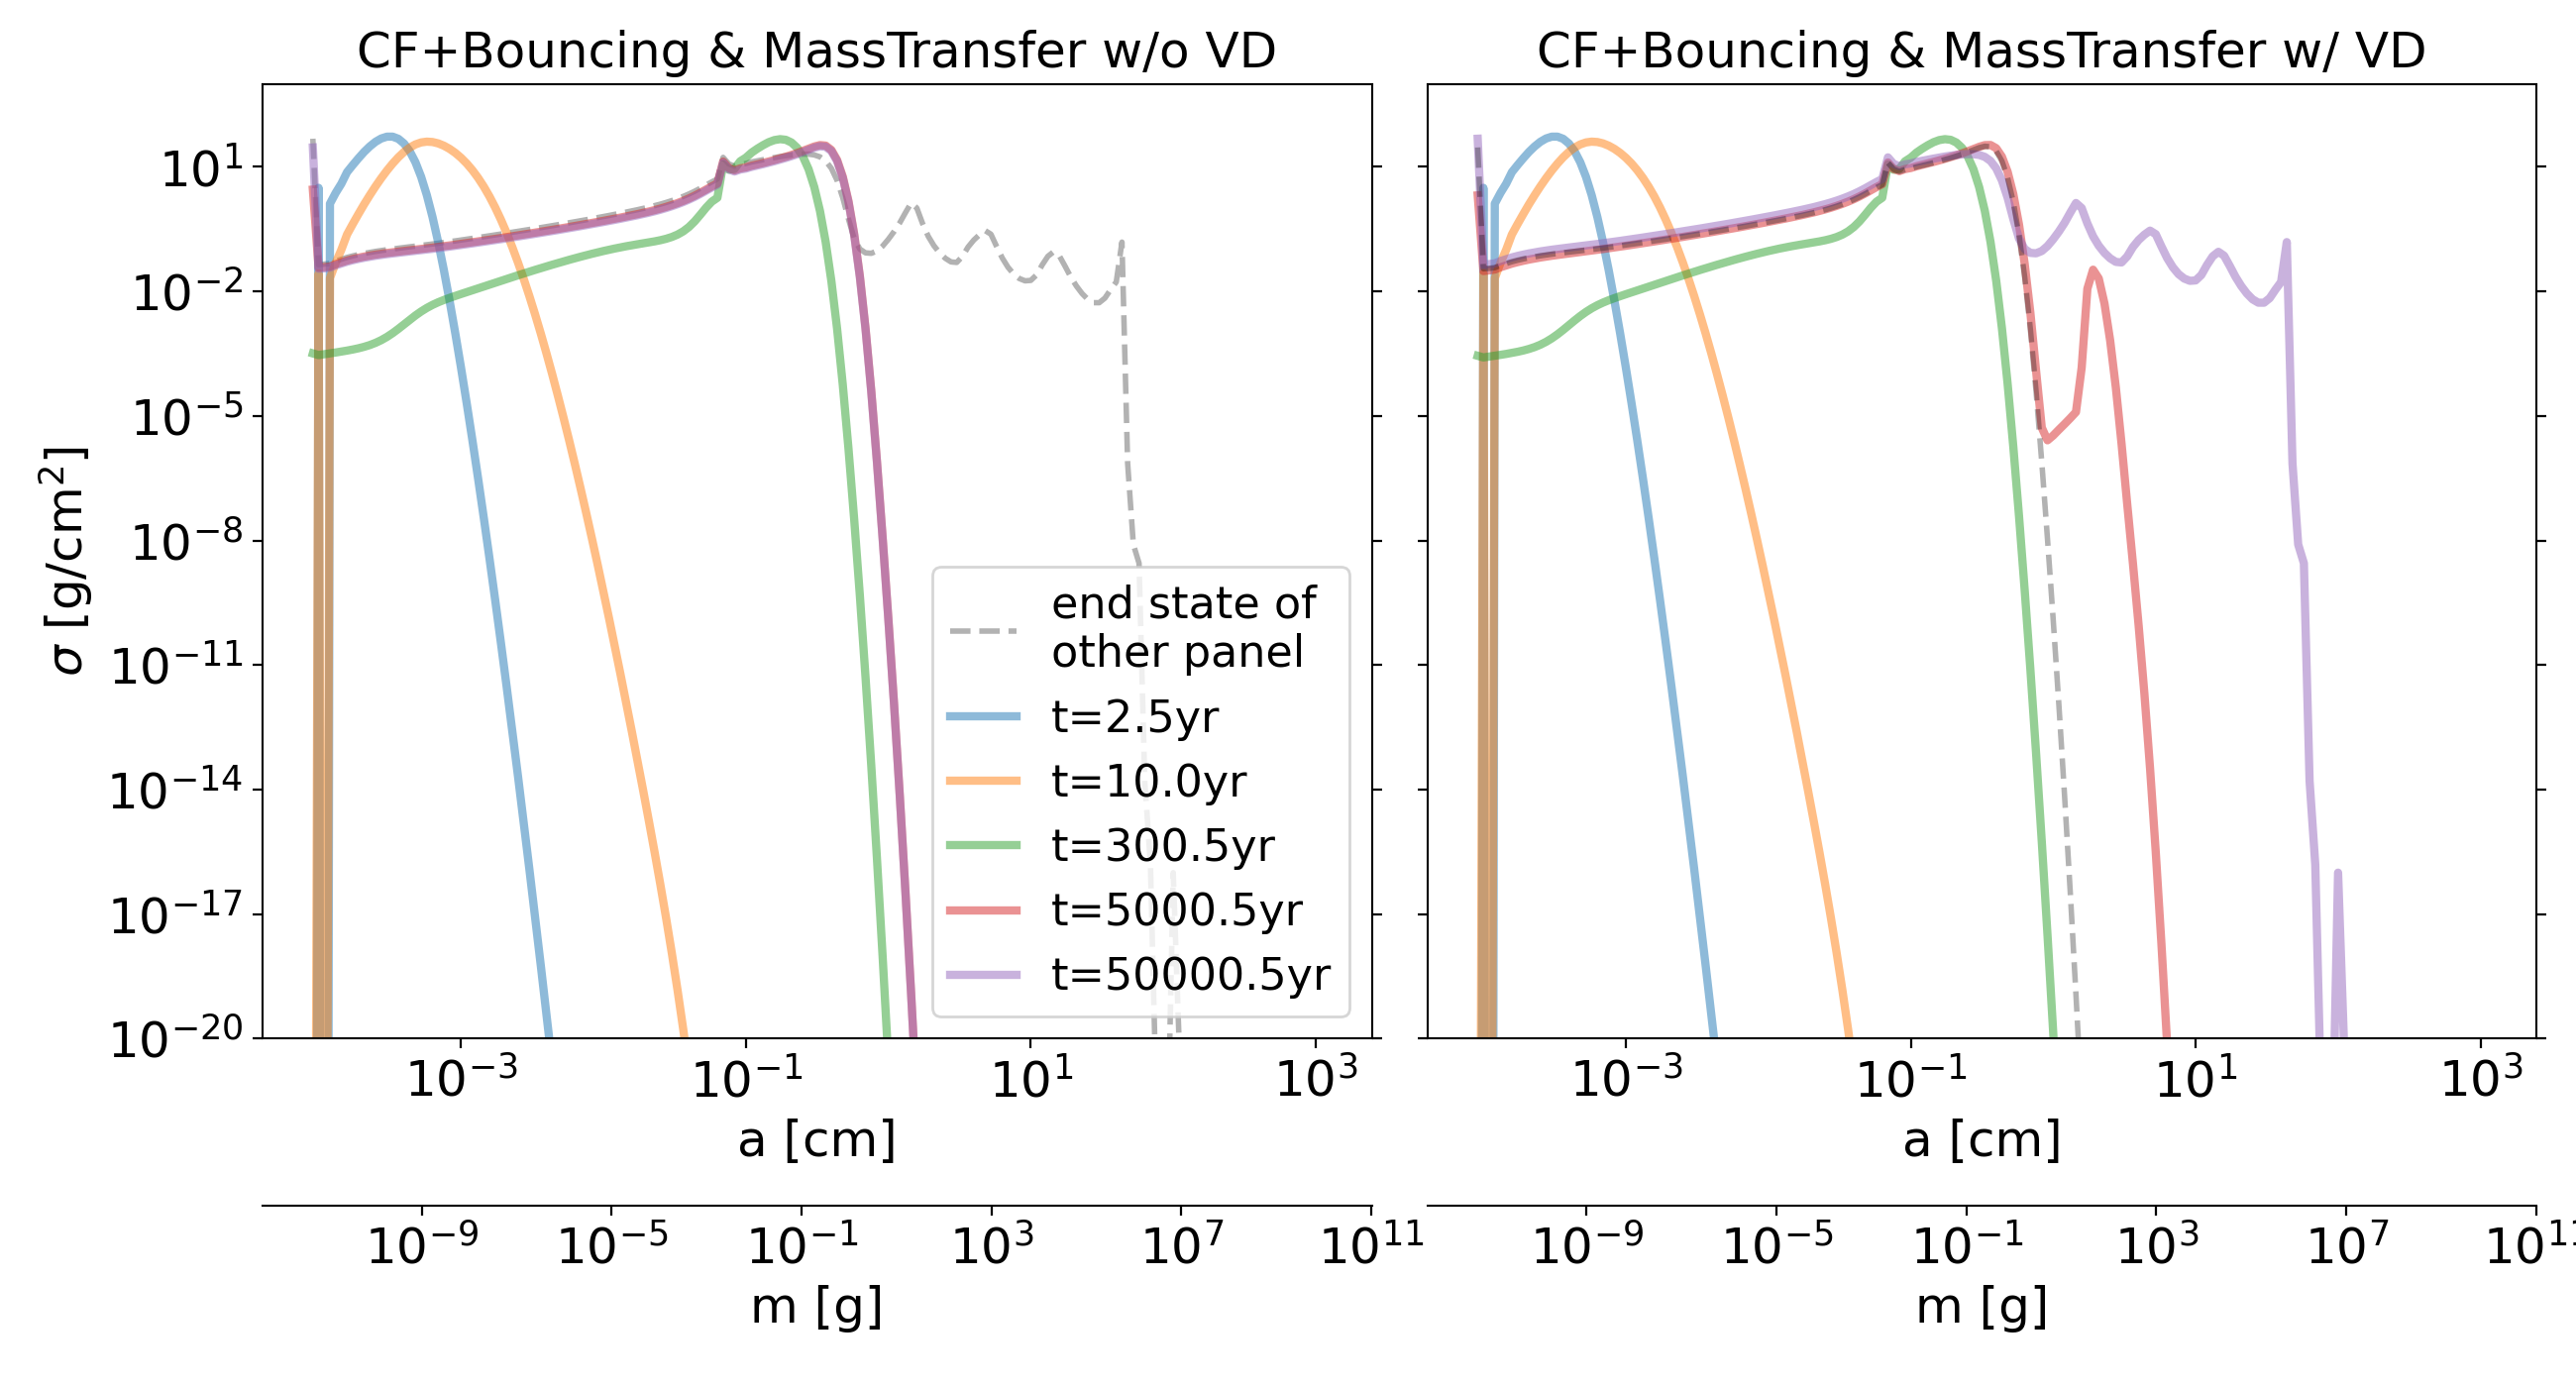

In [22]:
rds = [RubbleData("CBF_MT_noVD.dat"), RubbleData("CBF_MT_VD.dat")]
rxplt.plt_params('m'); fig, ax = plt.subplots(1, 2, figsize=(13, 7), sharey='row')

selected_t = [2.5, 10, 300, 5000, 50000]
ax[0].loglog(rds[1].a, rds[1].sigma[-1], '--k', lw=2, alpha=0.3, label="end state of\nother panel")
rds[0].plot_snapshots(selected_t, ax=ax[0], label_fmt="t={:.1f}yr")
rds[1].plot_snapshots(selected_t, ax=ax[1])
ax[0].set(title=r"CF+Bouncing & MassTransfer w/o VD", ylim=[1e-20, 1e3])
ax[0].legend(loc='lower right')
ax[1].loglog(rds[0].a, rds[0].sigma[-1], '--k', lw=2, alpha=0.3)
ax[1].set(ylabel='', title=r"CF+Bouncing & MassTransfer w/ VD", ylim=[1e-20, 1e3])
ax[1].get_legend().remove()
fig.tight_layout(); fig.subplots_adjust(wspace=0.05)

# Let's take a look at the time evolution and better understand how further solid growth is possible

## First, taking into account the velocity distributions in collisional outcomes enables the gradual emergence of larger and larger particles, as illustrated below

<IPython.core.display.Javascript object>


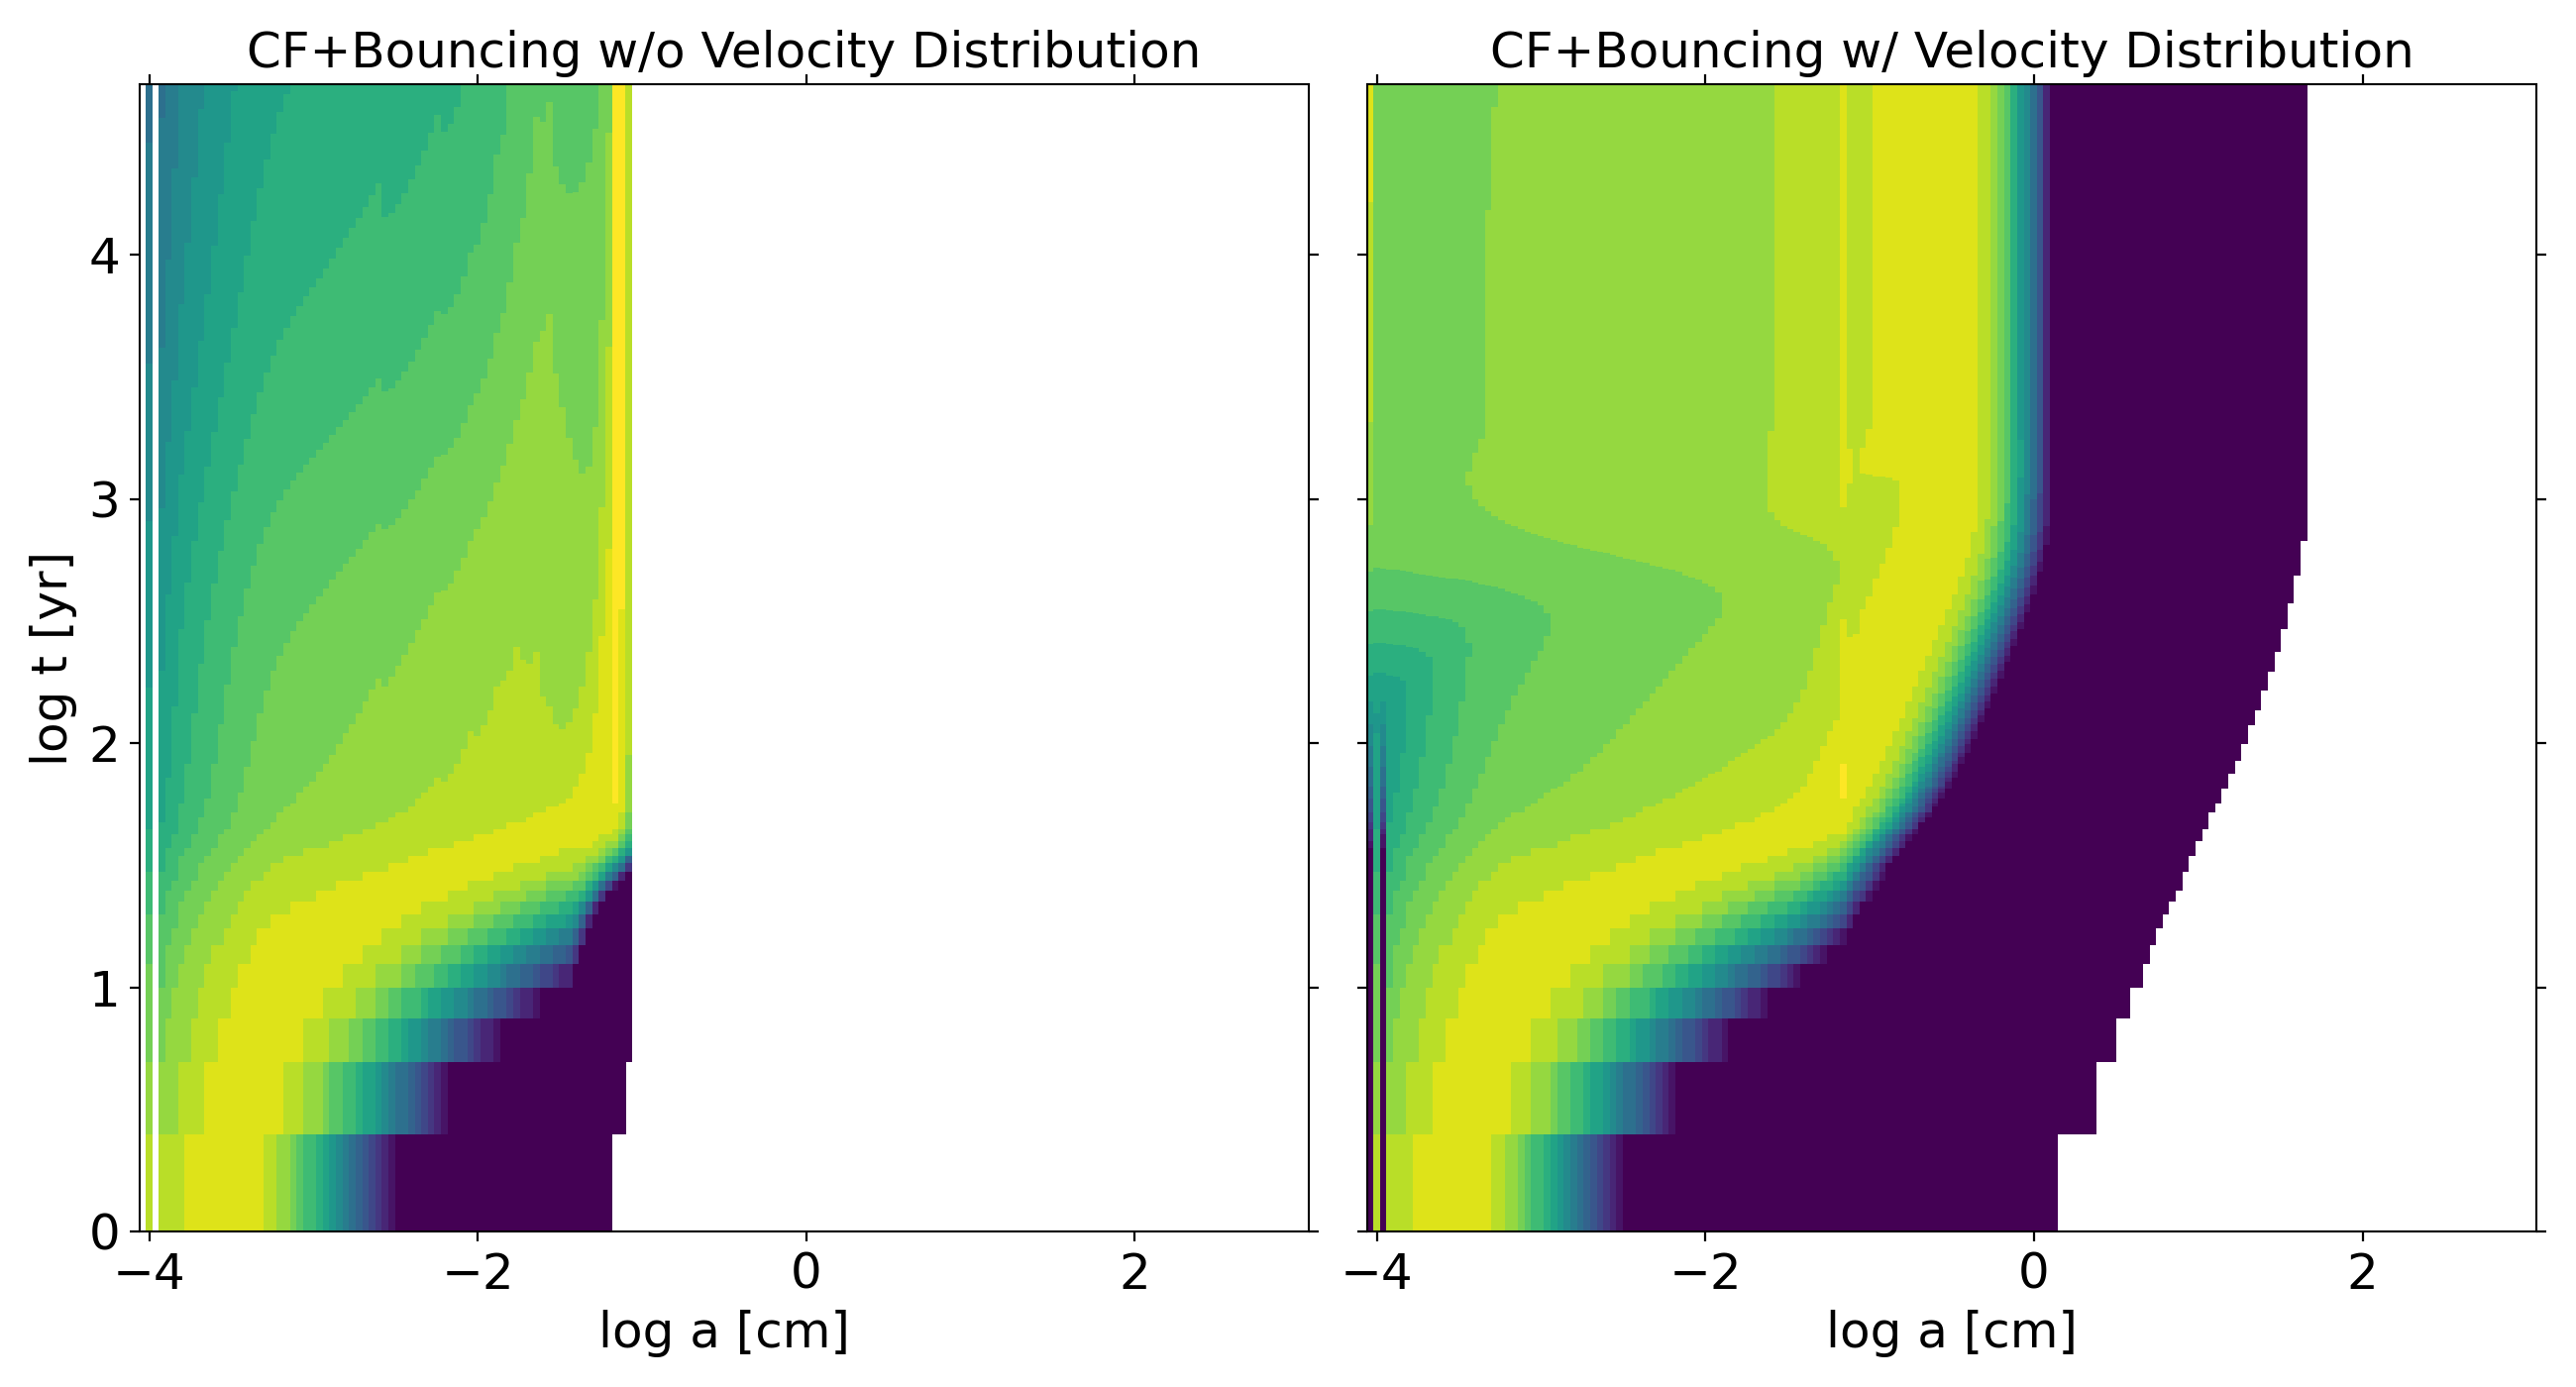

/home/u5/rixin/opt/py3puma/lib/python3.7/site-packages/rubble/rubble_data.py:283: RuntimeWarning: divide by zero encountered in log10
  ax.pcolor(np.log10(self.a), np.log10(log_t), np.log10(sigma_logyr), shading='auto',


In [6]:
# this cell should use the full data for better visualization
rds = [RubbleData("CBF_noVD.dat"), RubbleData("CBF_VD.dat")]
rxplt.plt_params('m'); fig, ax = plt.subplots(1, 2, figsize=(13, 7), sharey='row')

rds[0].plot_time_evolution(ax=ax[0])
rds[1].plot_time_evolution(ax=ax[1])
ax[0].set(title=r"CF+Bouncing w/o Velocity Distribution")
ax[1].set(title=r"CF+Bouncing w/ Velocity Distribution", ylabel='')

fig.tight_layout(); fig.subplots_adjust(wspace=0.05)

## Second, further growth is then enabled by mass transfer, as shown in the step-by-step advancement of the wedge-shaped area

<IPython.core.display.Javascript object>


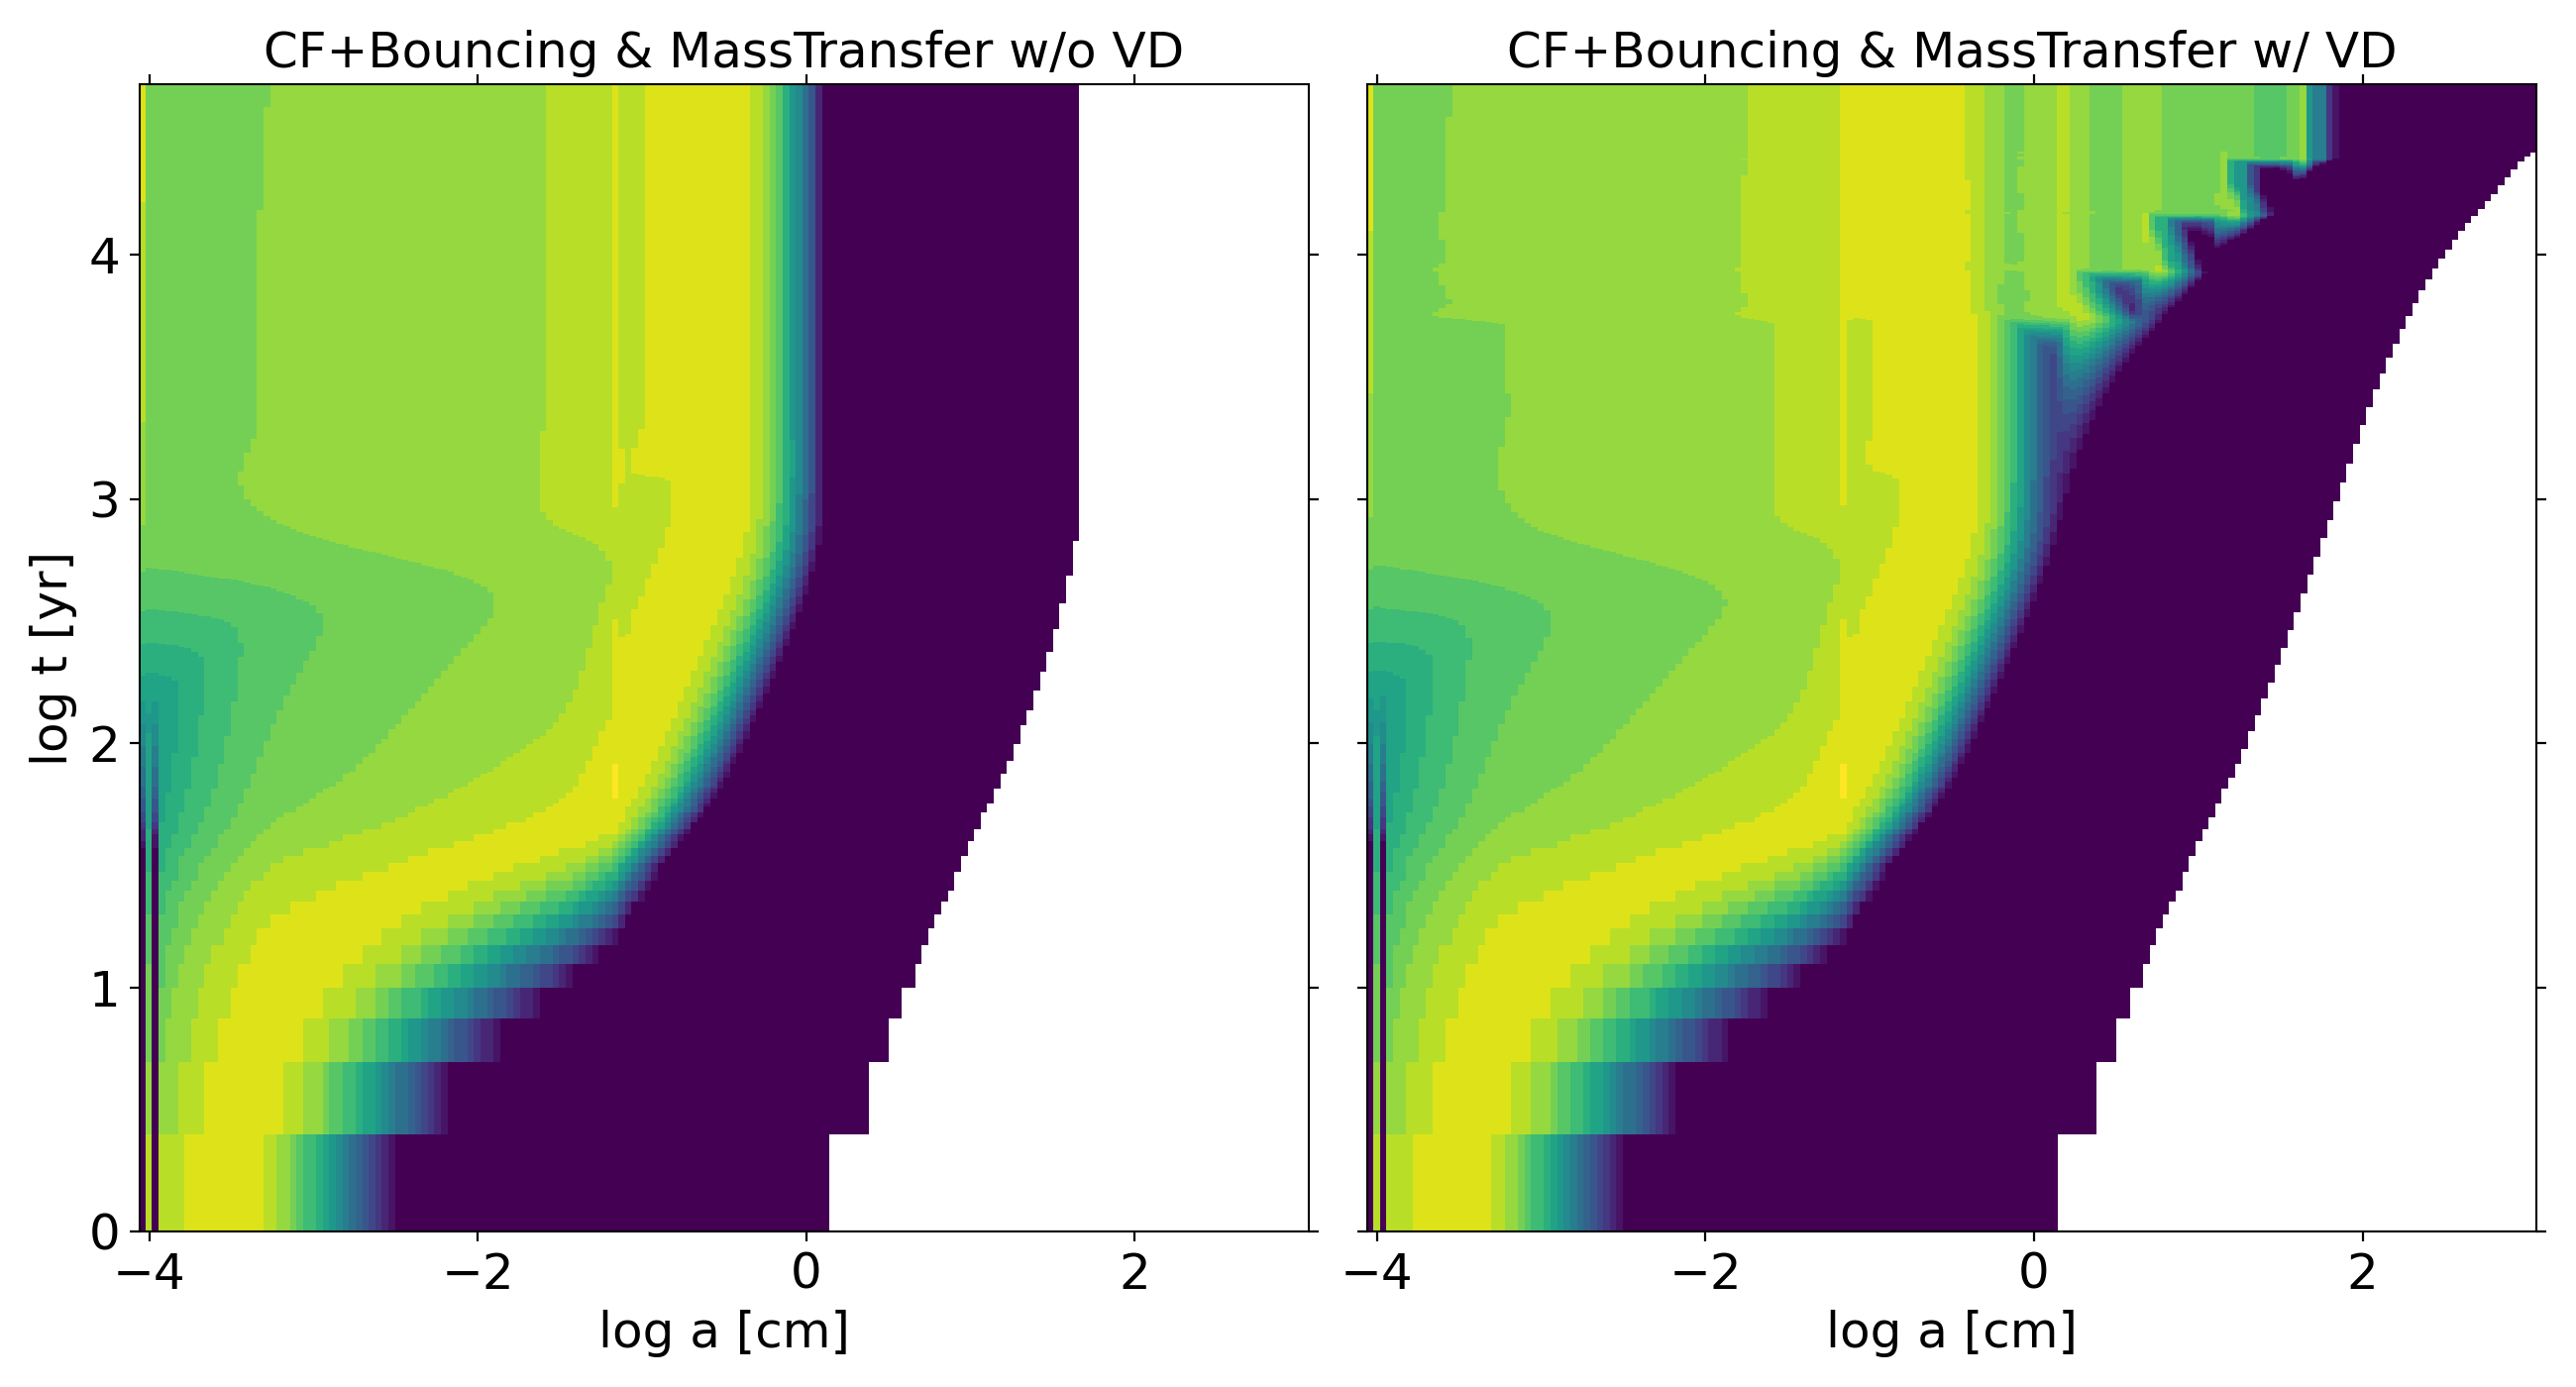

In [7]:
# this cell should use the full data for better visualization
rds = [RubbleData("CBF_MT_noVD.dat"), RubbleData("CBF_MT_VD.dat")]
rxplt.plt_params('m'); fig, ax = plt.subplots(1, 2, figsize=(13, 7), sharey='row')

rds[0].plot_time_evolution(ax=ax[0])
rds[1].plot_time_evolution(ax=ax[1])
ax[0].set(title=r"CF+Bouncing & MassTransfer w/o VD")
ax[1].set(title=r"CF+Bouncing & MassTransfer w/ VD", ylabel='')

fig.tight_layout(); fig.subplots_adjust(wspace=0.05)

## We can zoom into the evolution from 1000 yr to 1e4 yr and take a closer look.

<IPython.core.display.Javascript object>


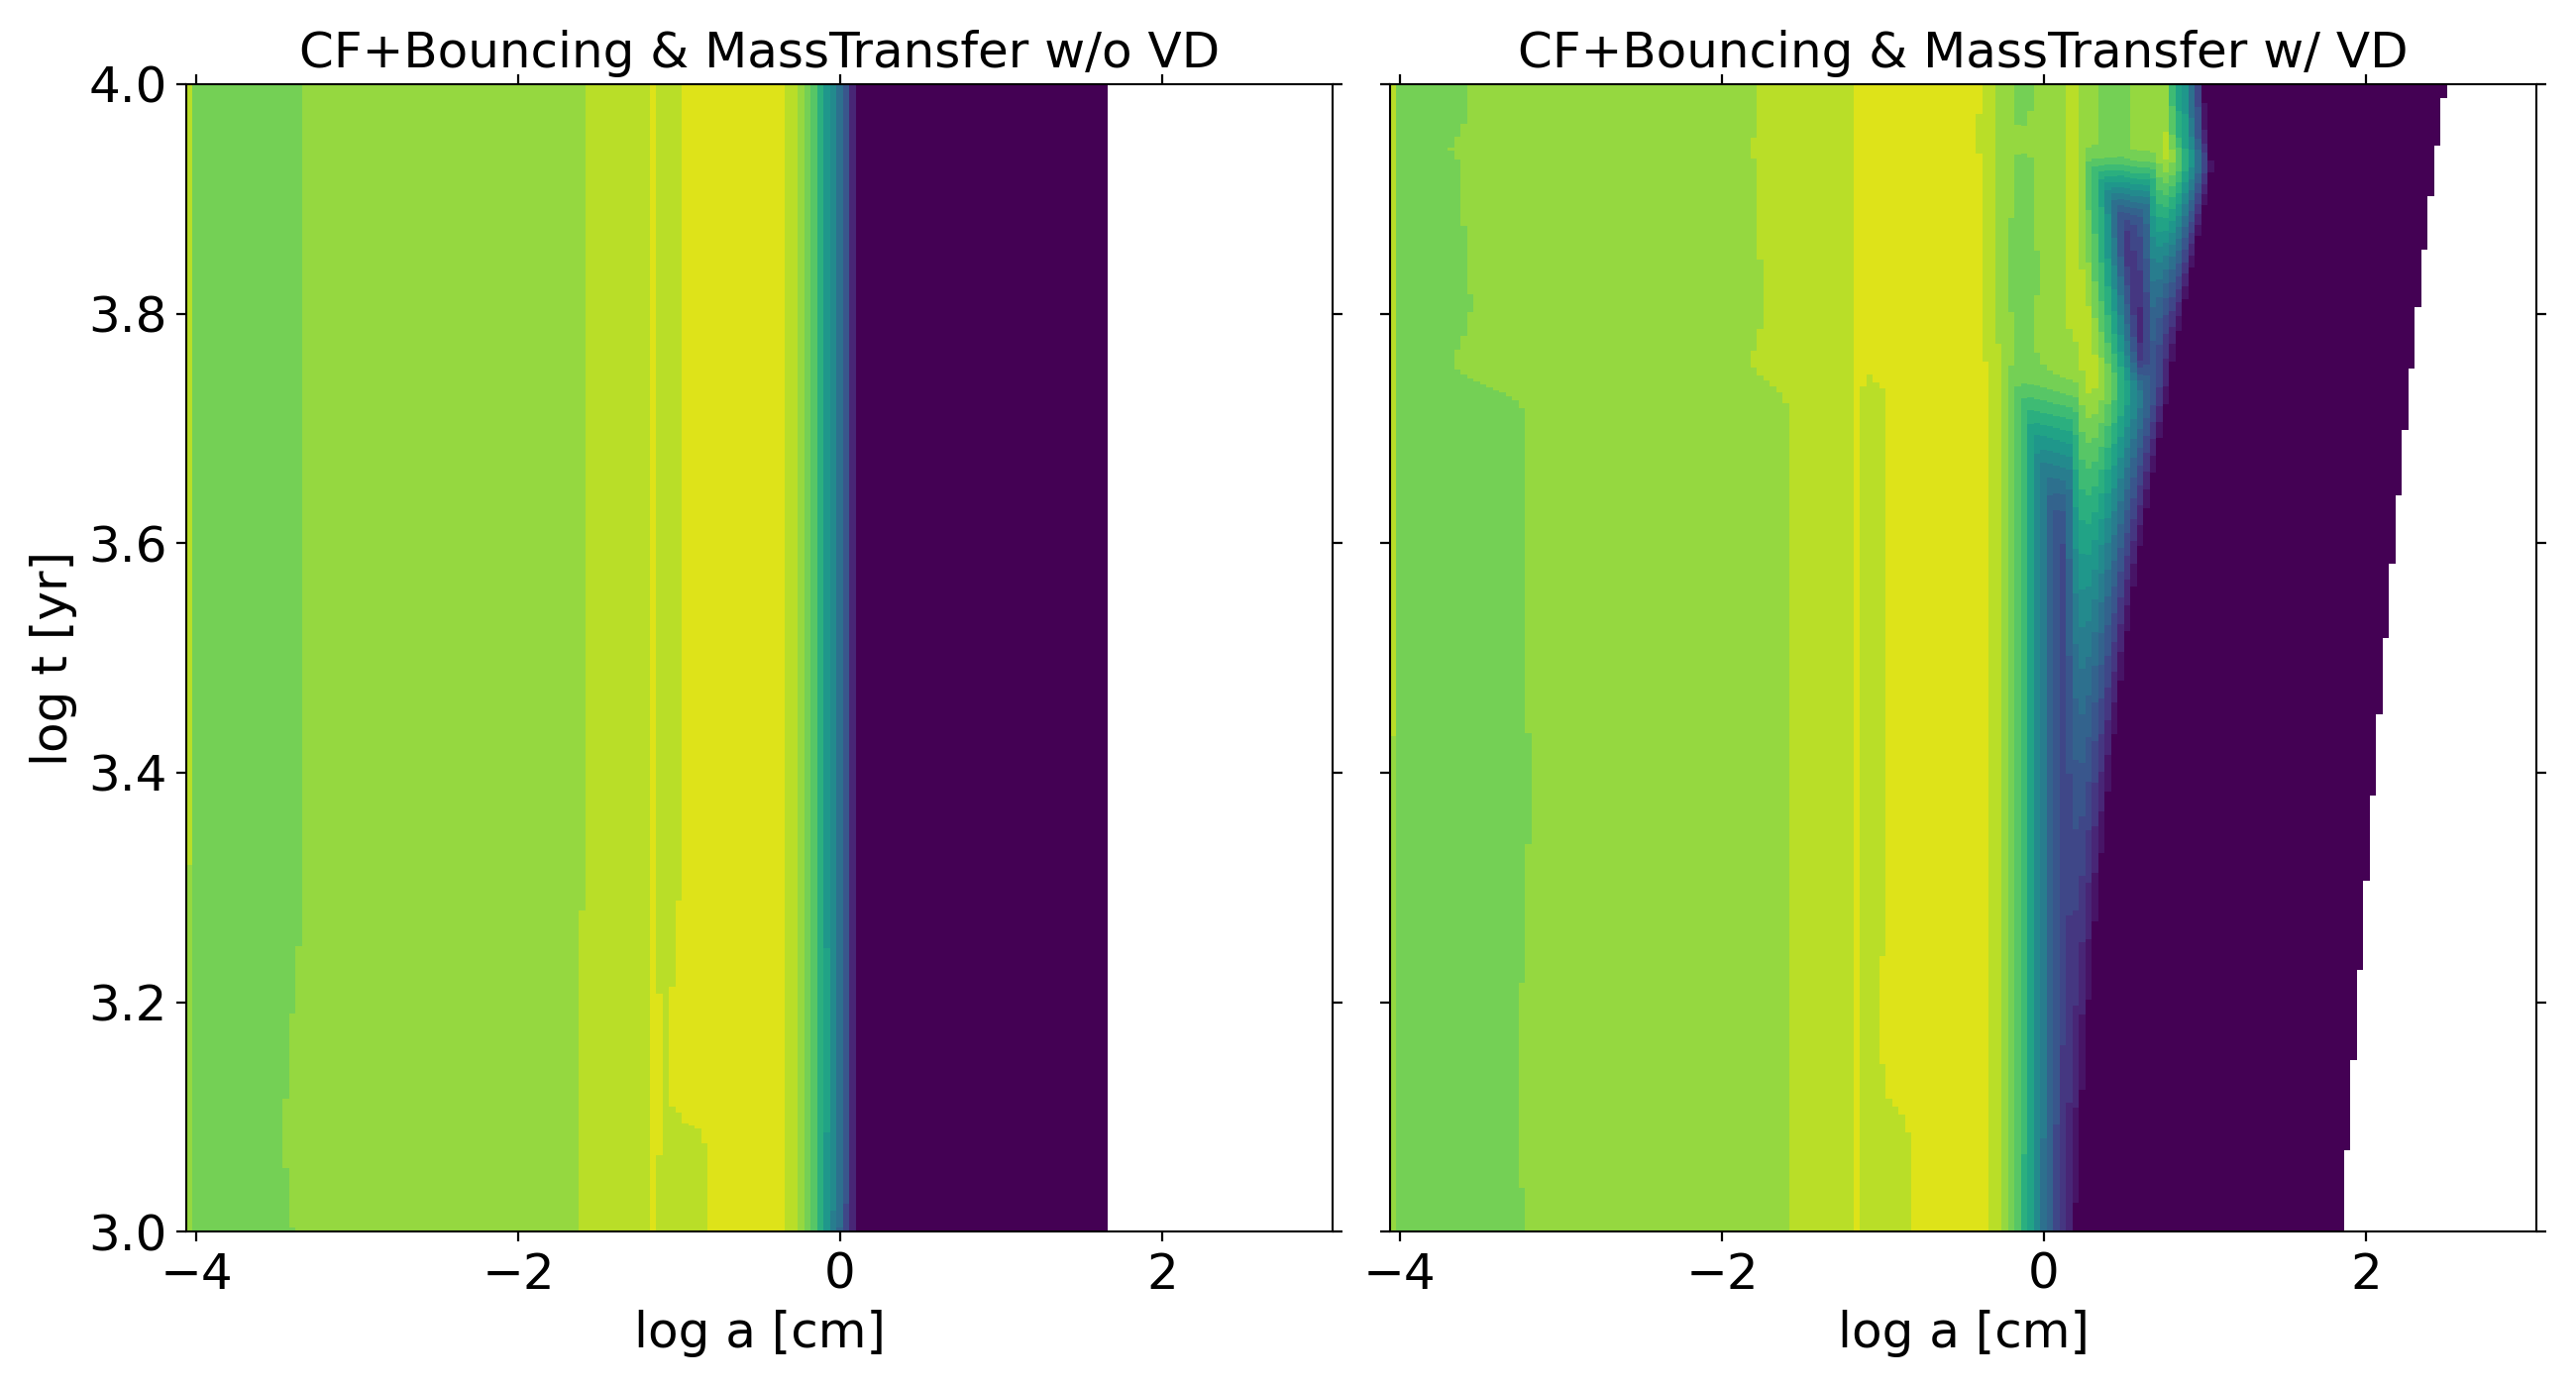

In [18]:
# this cell should use the full data for better visualization
rds = [RubbleData("CBF_MT_noVD.dat"), RubbleData("CBF_MT_VD.dat")]
rxplt.plt_params('m'); fig, ax = plt.subplots(1, 2, figsize=(13, 7), sharey='row')

rds[0].plot_time_evolution(ax=ax[0], t_range=(1e3, 1e4), num_t2plot=2048)
rds[1].plot_time_evolution(ax=ax[1], t_range=(1e3, 1e4), num_t2plot=2048)
ax[0].set(title=r"CF+Bouncing & MassTransfer w/o VD")
ax[1].set(title=r"CF+Bouncing & MassTransfer w/ VD", ylabel='')

fig.tight_layout(); fig.subplots_adjust(wspace=0.05)

### With mass transfer, a wedge shows up on the right of the original maximum. The gap between the two local maxima has a width that corresponds to the minimum mass ratio (i.e., 50) where mass transfer becomes fully effective. After a few thousand years, both local maxima of the size distribution evolve toward smaller sizes because the original maximum lost solids due to mass transfer and cannot support the growth of the wedge infinitely. However, the wedge has become well-established and gained a firm footing at $\sim 5000$ years. Similarly, a new wedge appears on the right of the first wedge, again due to mass transfer.

<img src="MT_explained.png">

## If we increase the minimum mass ratio where mass transfer becomes fully effective to 400, a wider gap shows up as expected.

In [ ]:
r = Rubble(176, 1e-4, 1e3, 3.5, 17, 
           delta_dist=1e-4,
           Sigma_g = 1700, H = H_W12.value, T = 280, alpha = 1e-4, 
           u_f = 100, mratio_c2MT=120, mratio_MT=400,
           run_name = "CBF_wideMT_VD")

r.run(50000, 2.5, 2.5)

In [30]:
rd = RubbleData("CBF_wideMT_VD.dat")
rd.shrink_data("CBF_wideMT_VD.dat", sampling_rate=10, keep_first_n=40)

<IPython.core.display.Javascript object>


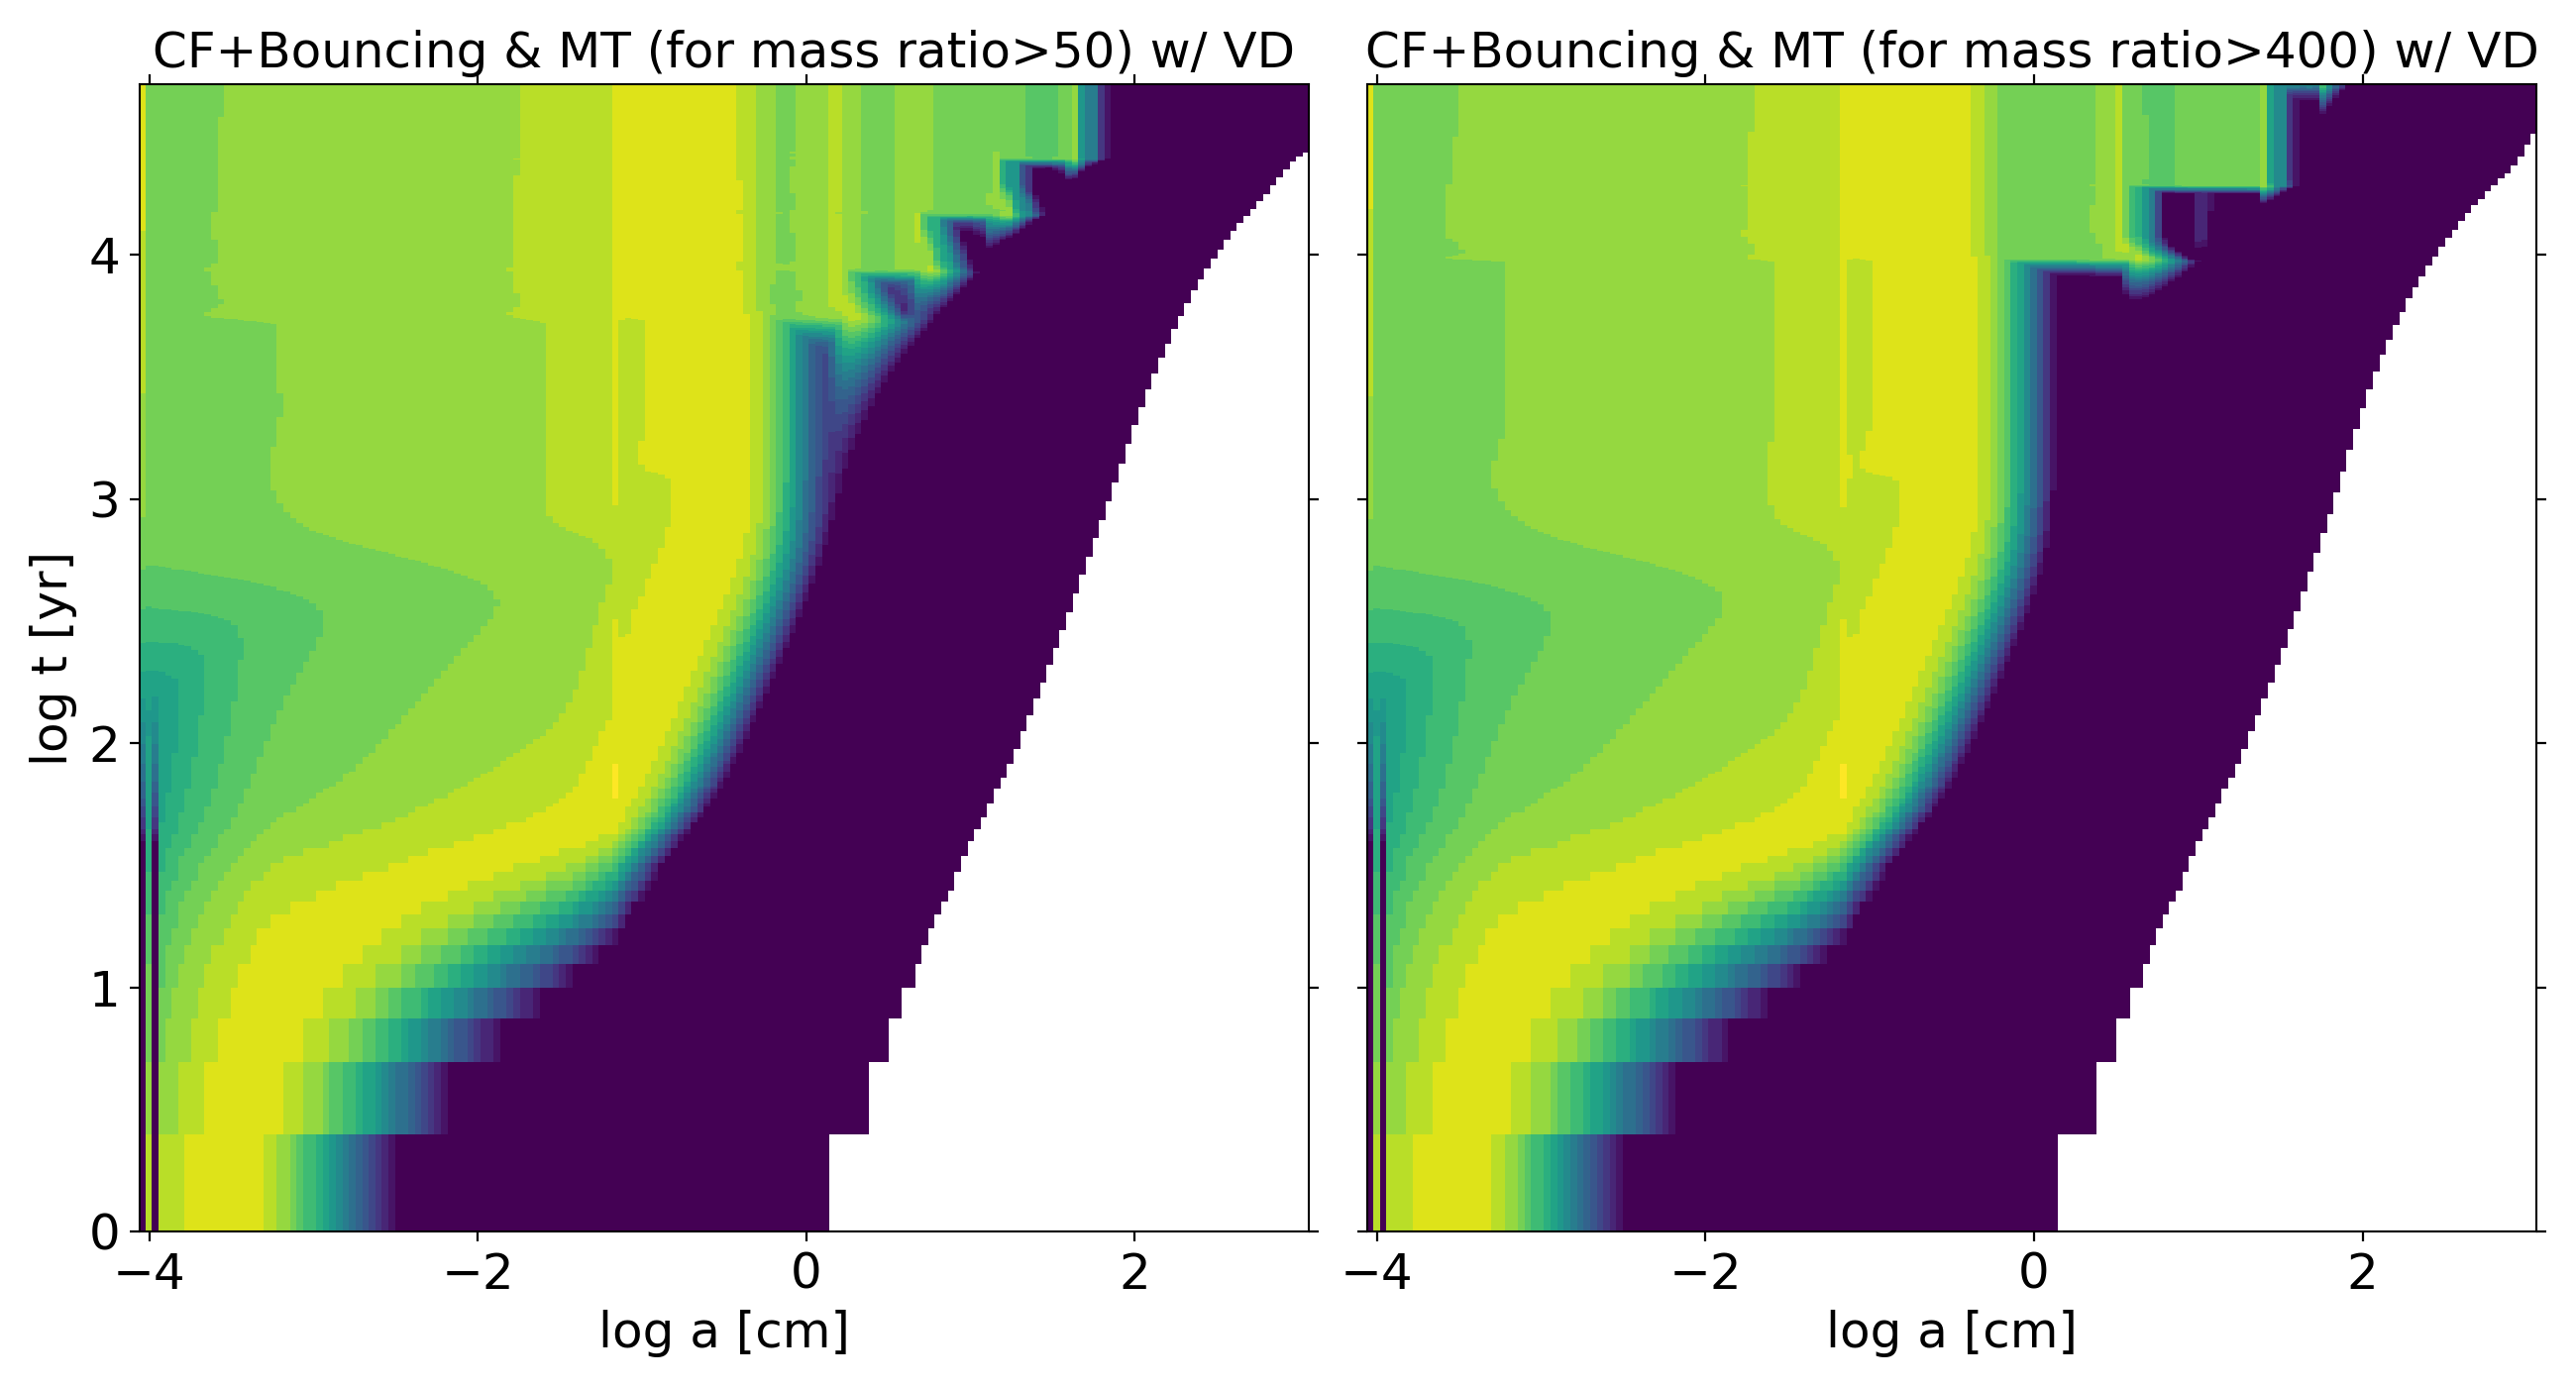

In [31]:
# this cell should use the full data for better visualization
rds = [RubbleData("CBF_MT_VD.dat"), RubbleData("CBF_wideMT_VD.dat")]
rxplt.plt_params('m'); fig, ax = plt.subplots(1, 2, figsize=(13, 7), sharey='row')

rds[0].plot_time_evolution(ax=ax[0])
rds[1].plot_time_evolution(ax=ax[1])
ax[0].set(title=r"CF+Bouncing & MT (for mass ratio>50) w/ VD")
ax[1].set(title=r"CF+Bouncing & MT (for mass ratio>400) w/ VD", ylabel='')

fig.tight_layout(); fig.subplots_adjust(wspace=0.05)